# importing required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_excel('Processed_Flipdata.xlsx')
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


# Data Exploration

In [3]:
print(df.head())

   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999  


In [4]:
print(df.columns)


Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')


In [5]:
print(df.info())  # Corrected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB
None


In [6]:
print(df.describe())


       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height         Prize  
count     541.000000    541.000000  
mean       16.431201  16228.375231  
std         2.523553  10793.588322  
min         4.500000    920.000000  
25%        16.510000   9290.000000  
50%        16.710000  13499.000000  
75%        16.940000  19280.000000  
max        41.940000  80999.000000  


In [7]:
print(df.isnull().sum())


Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [8]:
print(df.dtypes)

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object


In [9]:
df.drop('Unnamed: 0',axis=1)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


# Converting categorical features into numerical features

In [10]:
categorical_cols = ['Model','Colour','Rear Camera','Front Camera','Processor_']  # Adding the names of your categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop=first' to avoid multicollinearity
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_data.columns = encoder.get_feature_names(categorical_cols)

C:\Users\Sachin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# Replace original categorical columns with encoded columns in the original DataFrame
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, encoded_data], axis=1)

# Feature Extraction

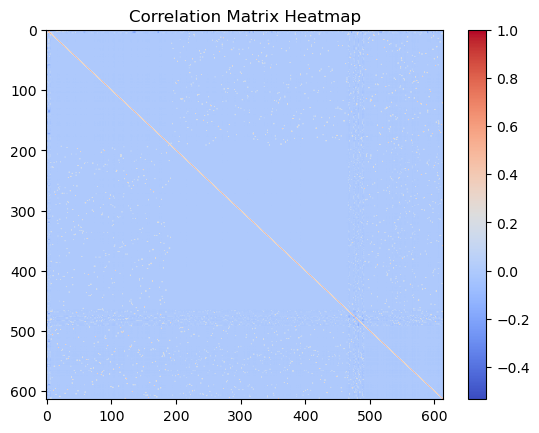

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

import matplotlib.pyplot as plt
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.show()

# Model Building

In [15]:
X = df.drop('Prize', axis=1)  # Features
y = df['Prize']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions from your trained model (replace with your actual model)
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the updated evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 1956.83
Root Mean Squared Error (RMSE): 4601.59


# Feature Importance Analysis

In [21]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                         Feature  Importance
1                         Memory    0.272106
3                       Battery_    0.129008
2                            RAM    0.095751
0                     Unnamed: 0    0.087850
480            Front Camera_12MP    0.085963
..                           ...         ...
403             Colour_Silk Blue    0.000000
401          Colour_Shadow Black    0.000000
389            Colour_Rainforest    0.000000
123  Model_SAMSUNG Galaxy S23 5G    0.000000
393            Colour_Rush Black    0.000000

[613 rows x 2 columns]


# Visualization of Feature Importances

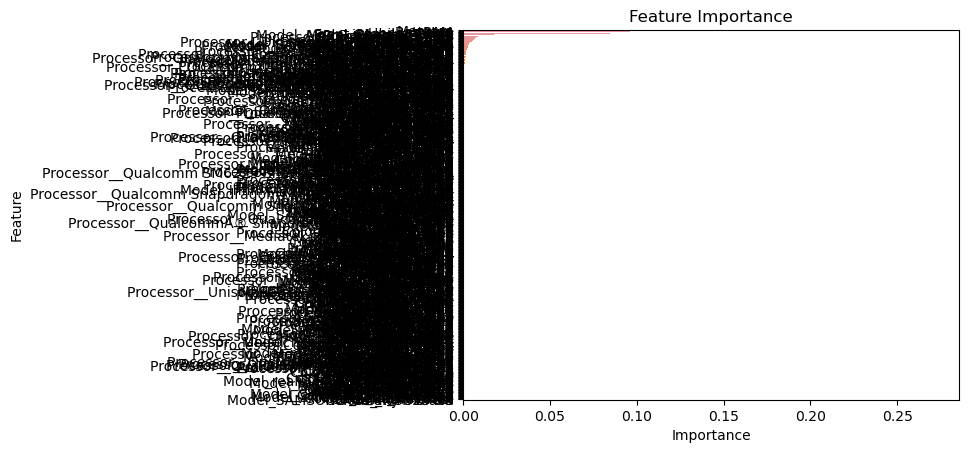

In [22]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()